# Decision Trees: Predicting College Admissions

In this exercise, we'll use decision trees to predict whether students get admitted to college based on their application data.

## What is a Decision Tree?

A decision tree is like a flowchart that asks yes/no questions about your data to make predictions. Unlike logistic regression which creates a smooth probability curve, decision trees create clear "if-then" rules.

For example:
- If CGPA > 9.0, then predict "Admitted"
- Else if GRE Score > 320 AND Research = 1, then predict "Admitted"
- Else predict "Not Admitted"

## Part 1: Load and Explore the Data


In [22]:
# JUST RUN THIS

from google.colab import drive
import pandas as pd

drive.mount('/content/gdrive')

# Load the data
df = pd.read_csv('/content/gdrive/MyDrive/datasets/admission_predict.csv')

# Convert "Chance of Admit" to a True/False "Admitted" column
df["Admitted"] = df["Chance of Admit "] > 0.75
df.drop("Chance of Admit ", axis=1, inplace=True)
df.rename(columns={"LOR ": "LOR"}, inplace=True)

# Explore the data
print(f"Total applicants: {len(df)}")
print(f"Admitted: {df['Admitted'].sum()}")
print(f"Not admitted: {(~df['Admitted']).sum()}")
print("\nColumns:")
print(df.columns.tolist())

# Look at a random sample of the data
print("\nRandom sample of 5 applicants:")
df.sample(5)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Total applicants: 400
Admitted: 172
Not admitted: 228

Columns:
['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research', 'Admitted']

Random sample of 5 applicants:


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admitted
264,265,325,110,2,3.0,2.5,8.76,1,False
181,182,305,107,2,2.5,2.5,8.42,0,False
82,83,320,110,5,5.0,4.5,9.22,1,True
59,60,311,104,2,2.0,2.0,8.30,0,False
346,347,304,97,2,1.5,2.0,7.64,0,False


## Part 2: Train-Test Split

Just like with logistic regression, we need to split our data for training and testing.


In [23]:
# JUST RUN THIS

from sklearn.model_selection import train_test_split

# Split the data
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

print(f"Training set: {len(df_train)} applicants")
print(f"Test set: {len(df_test)} applicants")

Training set: 320 applicants
Test set: 80 applicants


## Part 3: Prepare Features and Labels

Let's separate our features (X) from our labels (y).

### HINTS

This is exactly like the logistic regression assignment! We need to:
1. Select all columns except 'Serial No.' and 'Admitted' as features
2. Extract the 'Admitted' column as our labels

Remember:
- For features (X), we drop the columns we don't want
- For labels (y), we select just the 'Admitted' column

In [24]:
def prepare_features(df_train, df_test):
    features = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research']
    X_train = df_train[features]
    X_test  = df_test[features]
    return X_train, X_test

def prepare_labels(df_train, df_test):
    y_train = df_train['Admitted']
    y_test = df_test['Admitted']
    return y_train, y_test

# Test your function
X_train, X_test = prepare_features(df_train, df_test)
y_train, y_test = prepare_labels(df_train, df_test)
print(f"Features shape - Train: {X_train.shape}, Test: {X_test.shape}")
print(f"Features used: {X_train.columns.tolist()}")
print(f"Training: {y_train.sum()} admitted out of {len(y_train)}")
print(f"Testing: {y_test.sum()} admitted out of {len(y_test)}")

Features shape - Train: (320, 7), Test: (80, 7)
Features used: ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research']
Training: 140 admitted out of 320
Testing: 32 admitted out of 80


## Part 4: Train the Decision Tree Model

Time to train our decision tree! This is very similar to logistic regression, but we use `DecisionTreeClassifier` instead.

### HINTS

The pattern is almost identical to logistic regression:
1. Import and create the model
2. Fit it to the training data
3. Return the trained model

The only difference is we're using `DecisionTreeClassifier()` instead of `LogisticRegression()`.

In [25]:
from sklearn.tree import DecisionTreeClassifier

def train_decision_tree(X_train, y_train):
    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)
    return model

# Train the model
model = train_decision_tree(X_train, y_train)
print("Model trained!")
print(f"Tree depth: {model.get_depth()}")
print(f"Number of leaves: {model.get_n_leaves()}")

Model trained!
Tree depth: 8
Number of leaves: 43


## Part 5: Visualize the Decision Tree

One of the best things about decision trees is that we can see exactly how they make decisions!

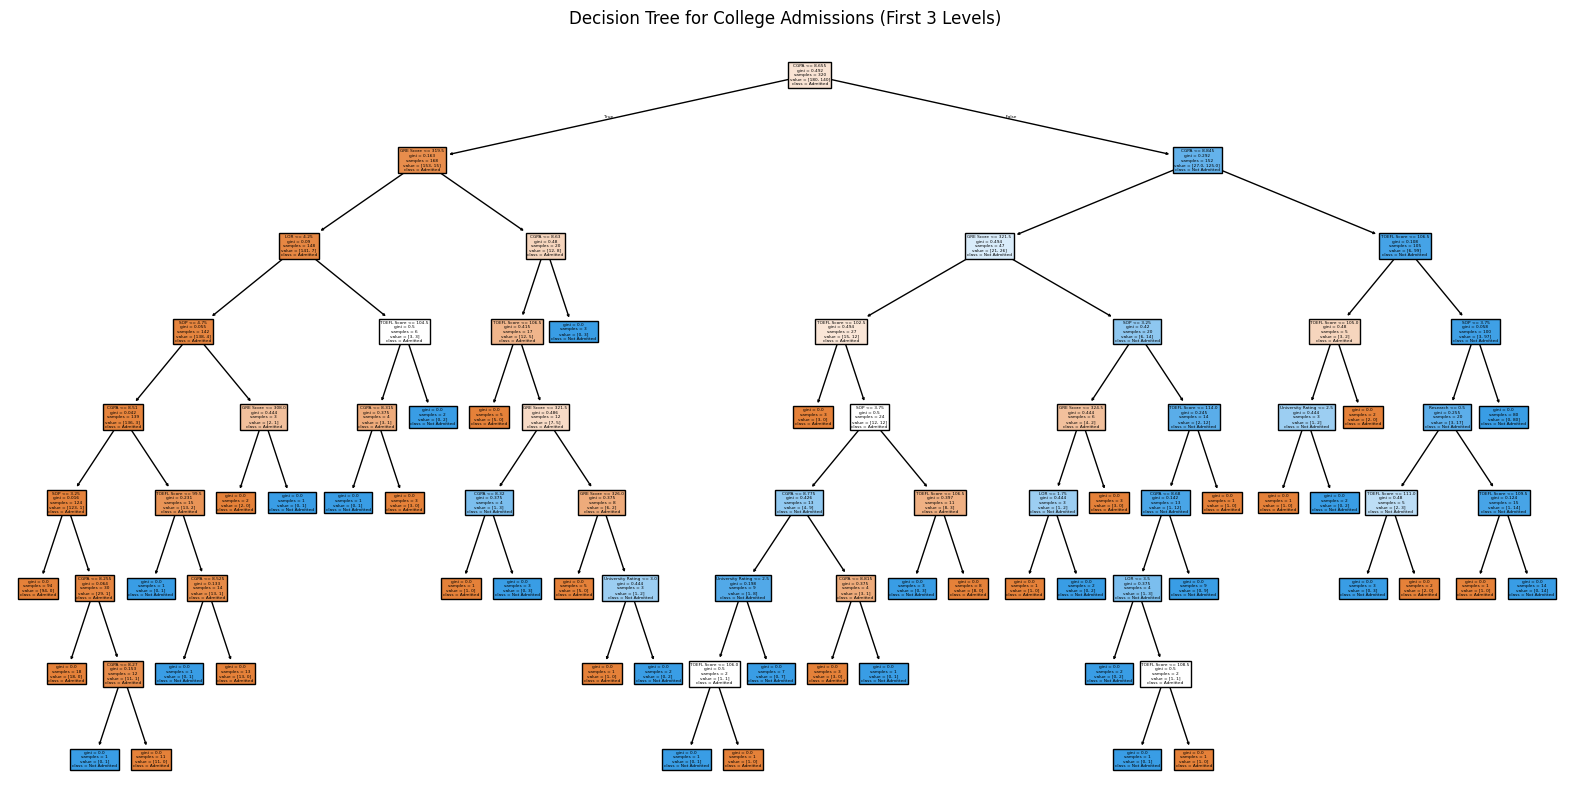

In [26]:
# JUST RUN THIS

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(model,
          feature_names=X_train.columns,
          class_names=['Admitted', 'Not Admitted'],
          filled=True,
          max_depth=8)  # Only show first 3 levels for clarity
plt.title("Decision Tree for College Admissions (First 3 Levels)")
plt.show()

# What do you notice about which features appear at the top of the tree?

## Part 6: Make Predictions

Now let's use our trained model to make predictions on the test set.

### HINTS

This is identical to the logistic regression assignment - just use `model.predict()`!

In [27]:
def make_predictions(model, X_test):
    y_pred = pd.Series(model.predict(X_test), index=X_test.index)
    return y_pred

# Make predictions
y_pred = make_predictions(model, X_test)
print(f"Predicted {y_pred.sum()} admissions out of {len(y_pred)} applicants")

Predicted 35 admissions out of 80 applicants


## Part 7: Evaluate Performance

Let's calculate our model's accuracy. For decision trees, accuracy is often a good metric because they naturally handle class imbalance well but the following code calculates the full confusion matrix and all three metrics.

In [28]:
# JUST RUN THIS

def calculate_confusion_matrix(y_test, y_pred):
    # Input: df has 'Admitted' and 'Predicted' columns
    # Output: Returns tp, tn, fp, fn
    tp = ((y_test == True)  & (y_pred == True)).sum()  # True Positive
    tn = ((y_test == False) & (y_pred == False)).sum() # True Negative
    fp = ((y_test == False) & (y_pred == True)).sum()  # False Positive
    fn = ((y_test == True)  & (y_pred == False)).sum() # False Negative
    return tp, tn, fp, fn

# Calculate confusion matrix
tp, tn, fp, fn = calculate_confusion_matrix(y_test, y_pred)
print("                  Predicted Positive | Predicted Negative")
print(f"Actual Positive |{tp:>19d} |{fn:>19d} ")
print(f"Actual Negative |{fp:>19d} |{tn:>19d} ")
print("")

# Calculate accuracy, precision, and recall
total = len(y_test)
accuracy = (tp + tn) / total
precision = tp / (tp + fp)
recall = tp / (tp + fn)
print(f"Accuracy:  {accuracy:>6.2%} (Correctly classified {tp + tn} out of {total})")
print(f"Precision: {precision:>6.2%} (When predicted positive, correct {precision:.0%} of the time)")
print(f"Recall:    {recall:>6.2%} (Found {recall:.0%} of all positive cases)")

                  Predicted Positive | Predicted Negative
Actual Positive |                 31 |                  1 
Actual Negative |                  4 |                 44 

Accuracy:  93.75% (Correctly classified 75 out of 80)
Precision: 88.57% (When predicted positive, correct 89% of the time)
Recall:    96.88% (Found 97% of all positive cases)


## Part 8: Feature Importance

Unlike logistic regression, decision trees can tell us exactly how important each feature is!

Feature Importances (higher = more important):
             Feature  Importance
5               CGPA    0.695166
1        TOEFL Score    0.139949
0          GRE Score    0.073339
3                SOP    0.036470
4                LOR    0.027914
2  University Rating    0.021869
6           Research    0.005291


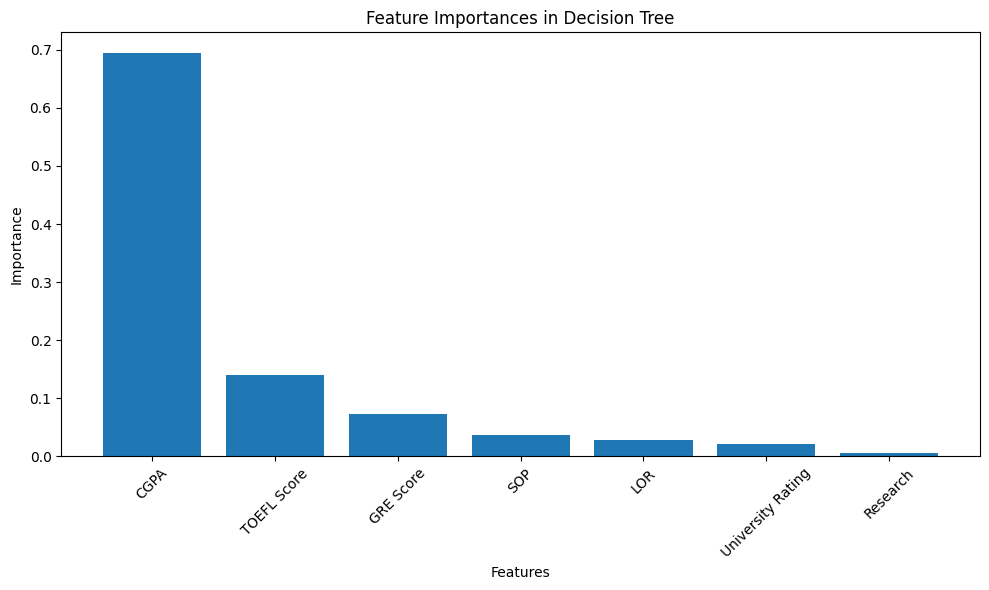

In [29]:
# JUST RUN THIS

# Get feature importances
importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

print("Feature Importances (higher = more important):")
print(importances)

# Visualize feature importances
plt.figure(figsize=(10, 6))
plt.bar(importances['Feature'], importances['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances in Decision Tree')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Bonus 1: Preventing Overfitting with Pruning

Decision trees can grow very deep and memorize the training data. Let's create a simpler tree that generalizes better.

### HINTS

We can control tree complexity with parameters:
- `max_depth`: Maximum depth of the tree
- `min_samples_split`: Minimum samples needed to split a node
- `min_samples_leaf`: Minimum samples in a leaf node

In [30]:
def train_pruned_tree(X_train, y_train, max_depth=3):
    model = DecisionTreeClassifier(max_depth=max_depth)
    model.fit(X_train, y_train)
    return model

# Train a simpler tree
simple_model = train_pruned_tree(X_train, y_train, max_depth=3)

# Evaluate the simpler model

simple_predictions = pd.Series(make_predictions(simple_model, X_test))

tp, tn, fp, fn = calculate_confusion_matrix(y_test, simple_predictions)
total = len(y_test)
simple_accuracy = (tp + tn) / (tp + tn + fp + fn)
print(f"Simple Tree (max_depth=3) Test Accuracy: {simple_accuracy:.2%}")
print(f"Original Tree Test Accuracy: {accuracy:.2%}")
print(f"\nSimple tree has {simple_model.get_n_leaves()} leaves vs {model.get_n_leaves()} in original")

Simple Tree (max_depth=3) Test Accuracy: 96.25%
Original Tree Test Accuracy: 93.75%

Simple tree has 8 leaves vs 43 in original


## Bonus 1.2: Visualize the Simpler Tree

Let's see how much simpler our pruned tree is:

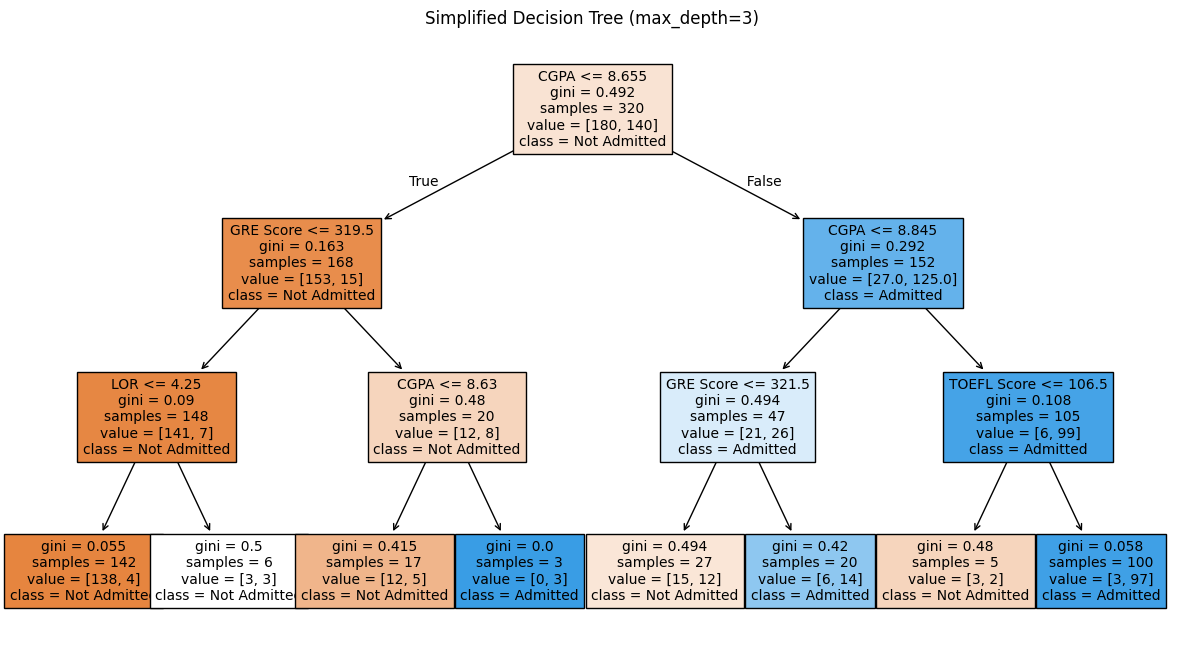

In [31]:
# JUST RUN THIS

plt.figure(figsize=(15, 8))
plot_tree(simple_model,
          feature_names=X_train.columns,
          class_names=['Not Admitted', 'Admitted'],
          filled=True,
          fontsize=10)
plt.title("Simplified Decision Tree (max_depth=3)")
plt.show()

# This tree is much easier to interpret!

## Bonus 2: Try Different Splitting Criteria

Decision trees can use different methods to decide how to split:
- **Gini** (default): Measures impurity
- **Entropy**: Measures information gain

Try creating a model with `criterion="entropy"` and see if it performs differently!

```python
entropy_model = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=42)
entropy_model.fit(X_train, y_train)

# Evaluate and compare
```

In [32]:
# BONUS CODE HERE

def train_pruned_tree(X_train, y_train, criterion="entropy"):
    model = DecisionTreeClassifier(criterion=criterion)
    model.fit(X_train, y_train)
    return model

# Train a simpler tree
alt_model = train_pruned_tree(X_train, y_train, "entropy")

# Evaluate the simpler model

alt_predictions = pd.Series(make_predictions(alt_model, X_test))

tp, tn, fp, fn = calculate_confusion_matrix(y_test, simple_predictions)
total = len(y_test)
alt_accuracy = (tp + tn) / (tp + tn + fp + fn)
print(f"Entropy Tree (max_depth=3) Test Accuracy: {alt_accuracy:.2%}")
print(f"Original Tree Test Accuracy: {accuracy:.2%}")


Entropy Tree (max_depth=3) Test Accuracy: 96.25%
Original Tree Test Accuracy: 93.75%


## Bonus 3: Convert Tree to Python Code

One amazing thing about decision trees is we can convert them to simple if-else statements!

This code converts your trained tree into a Python function:

In [33]:
# JUST RUN THIS (if you're curious)

from sklearn.tree import _tree

def tree_to_code(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    print("def predict_admission({}):".format(", ".join(feature_names)))

    def recurse(node, depth):
        indent = "    " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print("{}if {} <= {:.2f}:".format(indent, name, threshold))
            recurse(tree_.children_left[node], depth + 1)
            print("{}else:  # if {} > {:.2f}".format(indent, name, threshold))
            recurse(tree_.children_right[node], depth + 1)
        else:
            # Get the class prediction
            values = tree_.value[node][0]
            class_idx = values.argmax()
            class_name = "'Admitted'" if class_idx == 1 else "'Not Admitted'"
            print("{}return {}".format(indent, class_name))

    recurse(0, 1)

print("\nYour simple decision tree as Python code:")
print("=" * 50)
tree_to_code(simple_model, X_train.columns)
print("\n" + "=" * 50)
print("You could copy this function and use it anywhere!")


Your simple decision tree as Python code:
def predict_admission(GRE Score, TOEFL Score, University Rating, SOP, LOR, CGPA, Research):
    if CGPA <= 8.65:
        if GRE Score <= 319.50:
            if LOR <= 4.25:
                return 'Not Admitted'
            else:  # if LOR > 4.25
                return 'Not Admitted'
        else:  # if GRE Score > 319.50
            if CGPA <= 8.63:
                return 'Not Admitted'
            else:  # if CGPA > 8.63
                return 'Admitted'
    else:  # if CGPA > 8.65
        if CGPA <= 8.85:
            if GRE Score <= 321.50:
                return 'Not Admitted'
            else:  # if GRE Score > 321.50
                return 'Admitted'
        else:  # if CGPA > 8.85
            if TOEFL Score <= 106.50:
                return 'Not Admitted'
            else:  # if TOEFL Score > 106.50
                return 'Admitted'

You could copy this function and use it anywhere!
